# Pressure corrections figures

This code plots the time series of a pressure test conducted in saltwater to characterize the impact of pressure on conductivity readings. 

In [4]:
# import my librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import gsw
import scipy.signal as spi

Loads the proper file for SN060671

In [6]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect("/060671_20201201_1104_2k_CP_Tcold_RO_auto_noCP cor.rsk")

# query the data
df = pd.read_sql_query("SELECT tstamp AS time, channel01 AS conductivity, channel02 AS temperature, channel03 AS pressure from data", con, parse_dates= [])
con.close()

In [7]:
# Re-compute the salinity, including the determined K-factor to correct proximity effect of the tank on conductivity
df['salinity'] = gsw.SP_from_C(1.000054907840439*df['conductivity'], df['temperature'], df['pressure']-10.13)

df['conductivity_cor'] = 1.000054907840439*df['conductivity'] / (1 + 1.60e-6 * (df['pressure']-10.13) - 446e-12  * (df['pressure']-10.13)**2 + 55e-15 * (df['pressure']-10.13)**3)
df['salinity_cor'] = gsw.SP_from_C(df['conductivity_cor'],df['temperature'],df['pressure']-10.13)

#df['conductivity_cor_default'] = 1.000054907840439*df['conductivity'] / (1 + 2.1e-6 * (df['pressure']-10.13) - 0.77689e-9  * (df['pressure']-10.13)**2 + 0.14890e-12 * (df['pressure']-10.13)**3)
df['conductivity_cor_default'] = 1.000054907840439*df['conductivity'] / (1 + 1.8732e-6 * (df['pressure']) - 0.77689e-9  * (df['pressure'])**2 + 0.14890e-12 * (df['pressure'])**3)
df['salinity_cor_default'] = gsw.SP_from_C(df['conductivity_cor_default'],df['temperature'],df['pressure']-10.13)


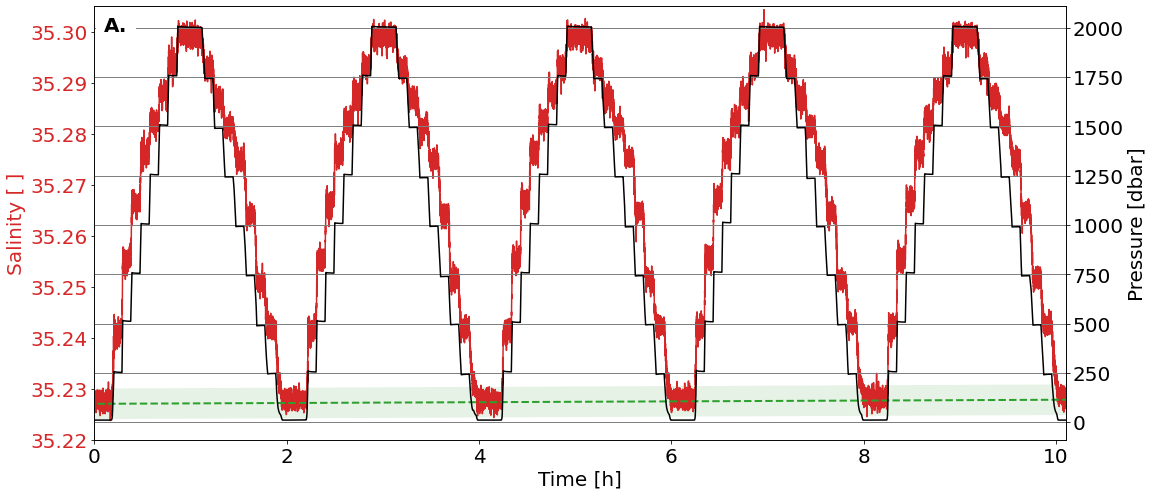

In [16]:
start = 16000
finish = 52500
blop = spi.savgol_filter(df['salinity'][start:finish],1501,2)

# Plot the uncorrected data
fig, ax2 = plt.subplots(1,1,figsize=(15,7))


# Salinity time series
color = 'tab:red'
ax2.set_xlabel('Time [h]', fontsize=20)
ax2.set_ylabel('Salinity [ ]', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot((df['time'][start:finish]-df['time'][start])/3600000,df['salinity'][start:finish], color=color)
#ax2.plot((df['time'][start:finish]-df['time'][start])/3600000,blop, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.axis('tight')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim(0,10.1)
plt.ylim(35.22,35.305)

# add the reference salinity and label
ax2.plot([(1606767623604-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000],[35.2270,35.2280], color = 'tab:green', linewidth = 2, linestyle = '--')
ax2.fill([(1606767623604-df['time'][start])/3600000,(1606767623604-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000,(1606767623604-df['time'][start])/3600000],[35.2270-0.003,35.2270+0.003,35.228+0.003,35.228-0.003,35.2270-0.003],'g',alpha= .1)
#ax2.text(0.1, 35.306, 'A.', fontsize=20, fontweight='bold')

# overlay the pressure time series
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'k'
ax1.set_ylabel('Pressure [dbar]', color=color, fontsize=20)
ax1.plot((df['time'][start:finish]-df['time'][start])/3600000,df['pressure'][start:finish], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', which='major', labelsize=20)
plt.grid(color=[.5,.5,.5], linestyle='-', linewidth=1)
ax1.text(0.1,1980,'A.',backgroundcolor = 'w', fontweight='bold',fontsize=20)

# save figure
plt.savefig("Fig5_Pressure_correction_raw.png",bbox_inches='tight',facecolor='w')

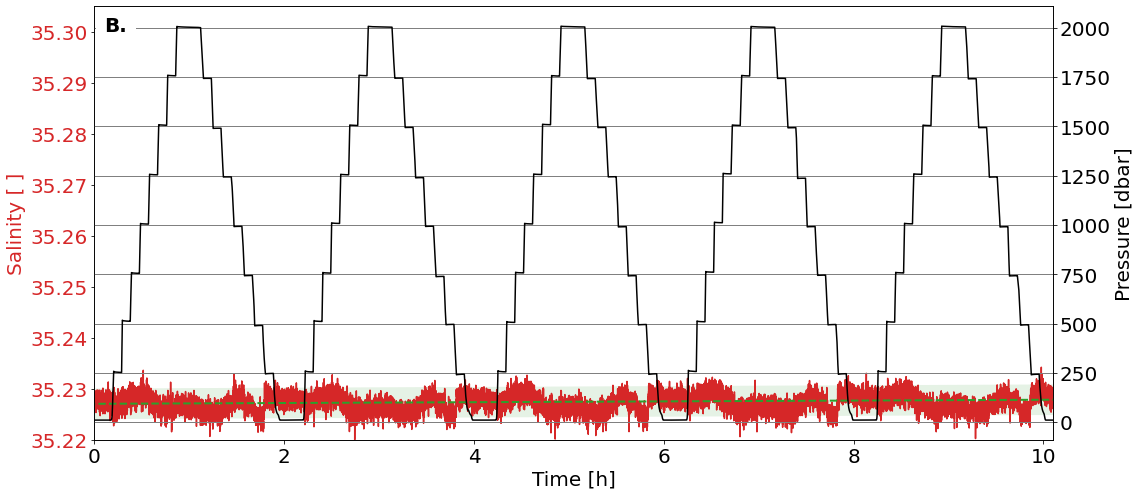

In [17]:
blop = spi.savgol_filter(df['salinity_cor'][start:finish],1501,2)

# Plot the uncorrected data
fig, ax2 = plt.subplots(1,1,figsize=(15,7))

# Salinity time series
color = 'tab:red'
ax2.set_xlabel('Time [h]', fontsize=20)
ax2.set_ylabel('Salinity [ ]', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot((df['time'][start:finish]-df['time'][start])/3600000,df['salinity_cor'][start:finish], color=color)
#ax2.plot((df['time'][start:finish]-df['time'][start])/3600000,blop, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.axis('tight')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim(0,10.1)
plt.ylim(35.22,35.305)

# add the reference salinity and label
ax2.plot([(1606767623604-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000],[35.2270,35.2280], color = 'tab:green', linewidth = 2, linestyle = '--')
ax2.fill([(1606767623604-df['time'][start])/3600000,(1606767623604-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000,(1606767623604-df['time'][start])/3600000],[35.2270-0.003,35.2270+0.003,35.228+0.003,35.228-0.003,35.2270-0.003],'g',alpha= .1)
#ax2.text(0.1, 35.306, 'B.', fontsize=20, fontweight='bold')

# overlay the pressure time series
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'k'
ax1.set_ylabel('Pressure [dbar]', color=color, fontsize=20)
ax1.plot((df['time'][start:finish]-df['time'][start])/3600000,df['pressure'][start:finish], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', which='major', labelsize=20)
plt.grid(color=[.5,.5,.5], linestyle='-', linewidth=1)
ax1.text(0.1,1980,'B.',backgroundcolor = 'w', fontweight='bold',fontsize=20)

# save figure
plt.savefig("Fig5_Pressure_correction_corr.png",bbox_inches='tight',facecolor='w')


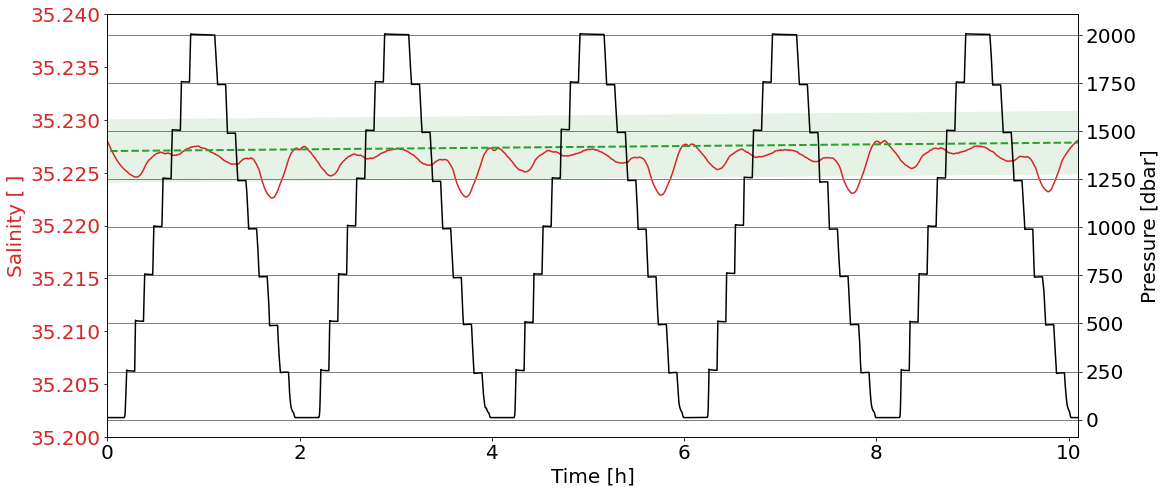

In [89]:
#blop = spi.savgol_filter(df['salinity_cor_default'][start:finish],1501,2)

# Plot the uncorrected data
fig, ax2 = plt.subplots(1,1,figsize=(15,7))
start = 16000
finish = 52500

# Salinity time series
color = 'tab:red'
ax2.set_xlabel('Time [h]', fontsize=20)
ax2.set_ylabel('Salinity [ ]', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot((df['time'][start:finish]-df['time'][start])/3600000,df['salinity_cor_default'][start:finish], color=color)
#ax2.plot((df['time'][start:finish]-df['time'][start])/3600000,blop, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.axis('tight')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim(0,10.1)
plt.ylim(35.200,35.240)

# add the reference salinity and label
ax2.plot([(1606767623604-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000],[35.2270,35.2280], color = 'tab:green', linewidth = 2, linestyle = '--')
ax2.fill([(1606767623604-df['time'][start])/3600000,(1606767623604-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000,(1606812923358-df['time'][start])/3600000,(1606767623604-df['time'][start])/3600000],[35.2270-0.003,35.2270+0.003,35.228+0.003,35.228-0.003,35.2270-0.003],'g',alpha= .1)

# overlay the pressure time series
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'k'
ax1.set_ylabel('Pressure [dbar]', color=color, fontsize=20)
ax1.plot((df['time'][start:finish]-df['time'][start])/3600000,df['pressure'][start:finish], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', which='major', labelsize=20)
plt.grid(color=[.5,.5,.5], linestyle='-', linewidth=1)

# save figure
#plt.savefig("Pressure_correction_corr_default.png",bbox_inches='tight',facecolor='w')
